# Convolutional Neural Network Architecture

## Created CNN Model using


*  Conv2D Layers
*  Batch Normalization
*  Max Pooling
*  Dropout
*  Flatten & Dense Layers


**Imports**:


1.   Tensorflow
2.   Keras
3.   Seaborn
4.   Matplotlib
5.   Numpy






In [ ]:
# Authors: Sai Prasad, Purnima Sai Koumudi
# Model saved time: 04/23

import tensorflow as tf
from keras.datasets import cifar10

**Downloading the dataset (CIFAR 10)**

In [ ]:
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [ ]:
disp_ind = []
for i in range(9):
  disp_ind.append(np.random.randint(0, X_train.shape[0]))

disp_ind

[10598, 37447, 39381, 26971, 43380, 14921, 24759, 30865, 15363]

**Plotting Few Images from CIFAR 10 dataset**

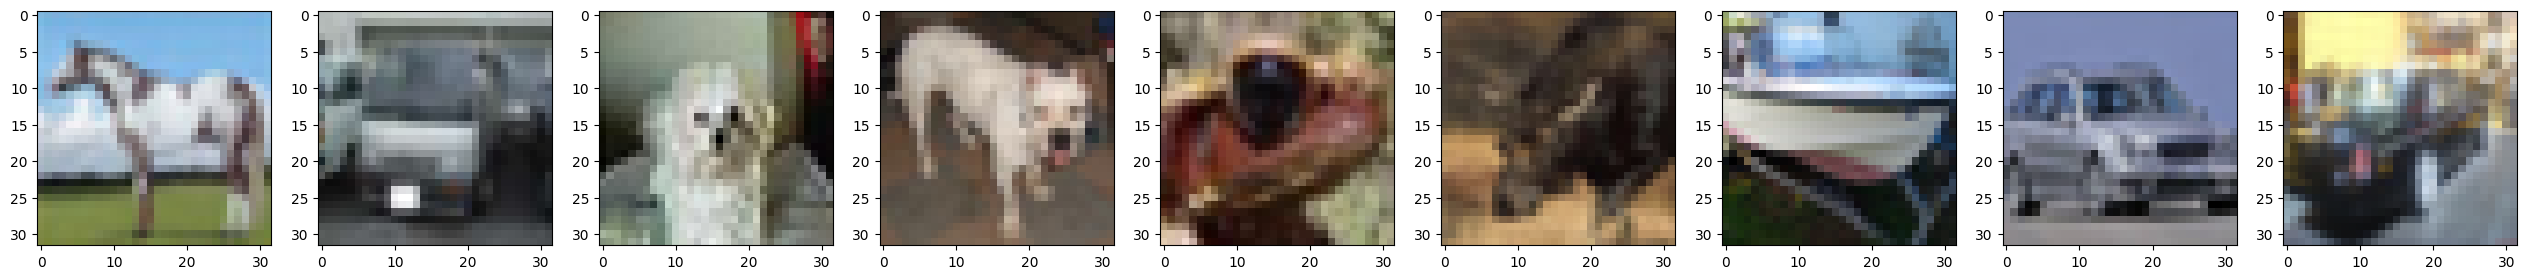

In [ ]:
fig,ax = plt.subplots(1,9,figsize=(32,32))
for i in range(len(disp_ind)):
  ax[i].imshow(X_train[disp_ind[i]])

In [ ]:
from tensorflow.keras.utils import to_categorical

**Splitting the model into Train and Test Dataset**

Train: 50000
Test: 10000

In [ ]:
y_train_ohe = to_categorical(y_train)
print(y_train_ohe.shape)
y_test_ohe = to_categorical(y_test)
print(y_test_ohe.shape)

(50000, 10)
(10000, 10)


In [ ]:
X_train_flt = X_train.astype(float)
X_test_flt = X_test.astype(float)

X_train_norm = X_train_flt/255
X_test_norm = X_test_flt/255

print(X_train_norm.shape)
print(X_test_norm.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,BatchNormalization
from sklearn.metrics import confusion_matrix
import seaborn as sns

# **CNN** Architecture

Optimizers used: Adam
Loss: Categorical Crossentropy

**Total Number of Epochs = 50**

Calculating Train and Validation accuracy

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=50,validation_data=(X_test_norm,y_test_ohe))

Epoch 1/50
1563/1563 [==============================] - 489s 311ms/step - loss: 1.6574 - accuracy: 0.3957 - val_loss: 1.1935 - val_accuracy: 0.5728
Epoch 2/50
1563/1563 [==============================] - 477s 305ms/step - loss: 1.1698 - accuracy: 0.5916 - val_loss: 0.9566 - val_accuracy: 0.6692
Epoch 3/50
1563/1563 [==============================] - 490s 313ms/step - loss: 0.9629 - accuracy: 0.6753 - val_loss: 0.8263 - val_accuracy: 0.7068
Epoch 4/50
1563/1563 [==============================] - 493s 316ms/step - loss: 0.8515 - accuracy: 0.7133 - val_loss: 0.7126 - val_accuracy: 0.7573
Epoch 5/50
1563/1563 [==============================] - 473s 302ms/step - loss: 0.7743 - accuracy: 0.7401 - val_loss: 0.6937 - val_accuracy: 0.7614
Epoch 6/50
1563/1563 [==============================] - 502s 321ms/step - loss: 0.7124 - accuracy: 0.7610 - val_loss: 0.6410 - val_accuracy: 0.7829
Epoch 7/50
1563/1563 [==============================] - 481s 308ms/step - loss: 0.6668 - accuracy: 0.7797 - val_

Plotting the Train Accuracy and Test Accuracy

Plotting the Train Loss and Test Loss

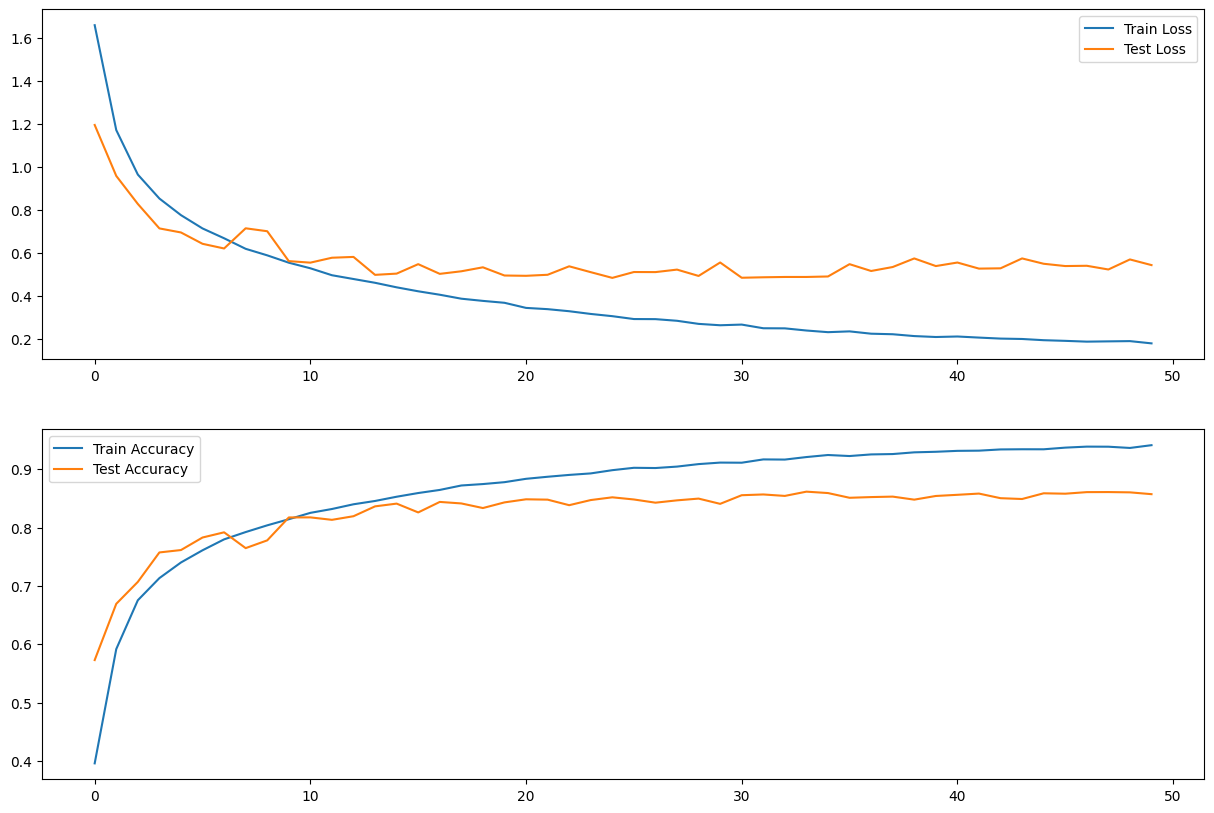

In [ ]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

**Evaluating the Model on Test dataset**

**Plotting CONFUSION MATRIX**

313/313 [==============================] - 25s 78ms/step


<Axes: >

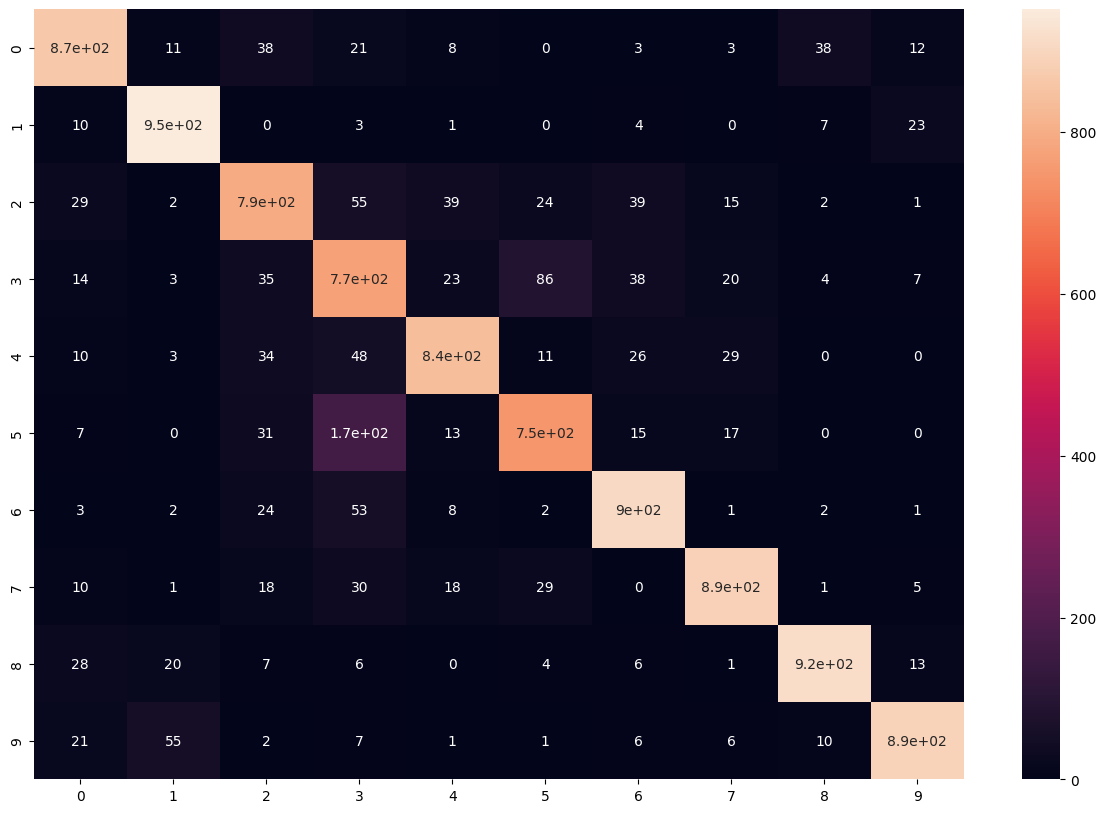

In [ ]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

Saving The Model

In [ ]:
model.save("trained_model_1.h5")